In [201]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import os
import collections
from matplotlib import pyplot as plt
import seaborn as sns
import imblearn

In [202]:
df = pd.read_csv('Banking Prediction Sample 1 - Dataset.csv')

df.head(5)

,Customer_ID,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag
0,1,M,52,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0
1,2,F,59,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0
2,3,M,52,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0
3,4,M,54,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0
4,5,F,61,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0


In [203]:
#korelace s cilovou promennou
df.corrwith(df['New_Credit_Card_Flag'])

Customer_ID             -0.070590
Age                     -0.043864
Tenure                   0.028626
Saving_Amount           -0.021669
Current_Amount          -0.006670
Time_Deposits_Amount    -0.010456
Funds_Amount            -0.010447
Stocks_Amount           -0.002930
Bank_Assurance_Amount    0.007735
Life_Assurance_Amount    0.012289
Business_Loan_Amount     0.018786
Home_Loan_Amount         0.002184
Consumer_Loan_Amount     0.087272
Branch_Transactions      0.086831
ATM_Transactions         0.091312
Phone_Transactions       0.059876
Internet_Transactions    0.243737
Standing_Orders          0.015878
New_Credit_Card_Flag     1.000000
dtype: float64

In [204]:
df.head(3).transpose()

,0,1,2
Customer_ID,1,2,3
Gender,M,F,M
Age,52,59,52
Tenure,49,49,49
Saving_Amount,0.0,0.0,18.825714
Current_Amount,0.0,0.0,0.0
Time_Deposits_Amount,0.0,0.0,0.0
Funds_Amount,0.0,0.0,0.0
Stocks_Amount,0.0,0.0,0.0
Bank_Assurance_Amount,139.194286,0.0,0.0


In [205]:
df.dtypes

Customer_ID                int64
Gender                    object
Age                        int64
Tenure                     int64
Saving_Amount            float64
Current_Amount           float64
Time_Deposits_Amount     float64
Funds_Amount             float64
Stocks_Amount            float64
Bank_Assurance_Amount    float64
Life_Assurance_Amount    float64
Business_Loan_Amount     float64
Home_Loan_Amount         float64
Consumer_Loan_Amount     float64
Branch_Transactions        int64
ATM_Transactions           int64
Phone_Transactions         int64
Internet_Transactions      int64
Standing_Orders            int64
New_Credit_Card_Flag       int64
dtype: object

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104733 entries, 0 to 104732
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_ID            104733 non-null  int64  
 1   Gender                 104733 non-null  object 
 2   Age                    104733 non-null  int64  
 3   Tenure                 104733 non-null  int64  
 4   Saving_Amount          104733 non-null  float64
 5   Current_Amount         104733 non-null  float64
 6   Time_Deposits_Amount   104733 non-null  float64
 7   Funds_Amount           104733 non-null  float64
 8   Stocks_Amount          104733 non-null  float64
 9   Bank_Assurance_Amount  104733 non-null  float64
 10  Life_Assurance_Amount  104733 non-null  float64
 11  Business_Loan_Amount   104733 non-null  float64
 12  Home_Loan_Amount       104733 non-null  float64
 13  Consumer_Loan_Amount   104733 non-null  float64
 14  Branch_Transactions    104733 non-nu

In [207]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_ID,104733.0,52367.000000,30233.957209,1.0,26184.0,52367.00,78550.000000,1.047330e+05
Age,104733.0,45.285803,15.540300,18.0,33.0,43.00,56.000000,9.000000e+01
Tenure,104733.0,53.938453,30.054760,0.0,33.0,55.00,71.000000,1.940000e+02
Saving_Amount,104733.0,1609.799590,7694.181205,0.0,0.0,21.19,519.491429,8.203444e+05
Current_Amount,104733.0,323.738039,2337.215922,0.0,0.0,0.00,0.000000,1.623751e+05
Time_Deposits_Amount,104733.0,1548.830453,21784.476797,0.0,0.0,0.00,0.000000,4.860896e+06
Funds_Amount,104733.0,967.336721,8716.537607,0.0,0.0,0.00,0.000000,5.809963e+05
Stocks_Amount,104733.0,617.910387,15906.599559,0.0,0.0,0.00,0.000000,3.826404e+06
Bank_Assurance_Amount,104733.0,9.542685,70.467561,0.0,0.0,0.00,0.000000,3.554189e+03
Life_Assurance_Amount,104733.0,2.744323,34.522766,0.0,0.0,0.00,0.000000,1.670480e+03


In [208]:
dfNums = df.drop(['Customer_ID','Gender','Age','Tenure','New_Credit_Card_Flag'], axis=1)
dfNums

,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders
0,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0
2,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0
3,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104728,112.900000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1,0,0,0,0
104729,16.130000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1,0,0,0,0
104730,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,129.030000,0,0,0,0,0
104731,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,807.740000,0,0,0,0,0


<ipython-input-209-36acda8ee668>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfNums.hist(ax=ax)


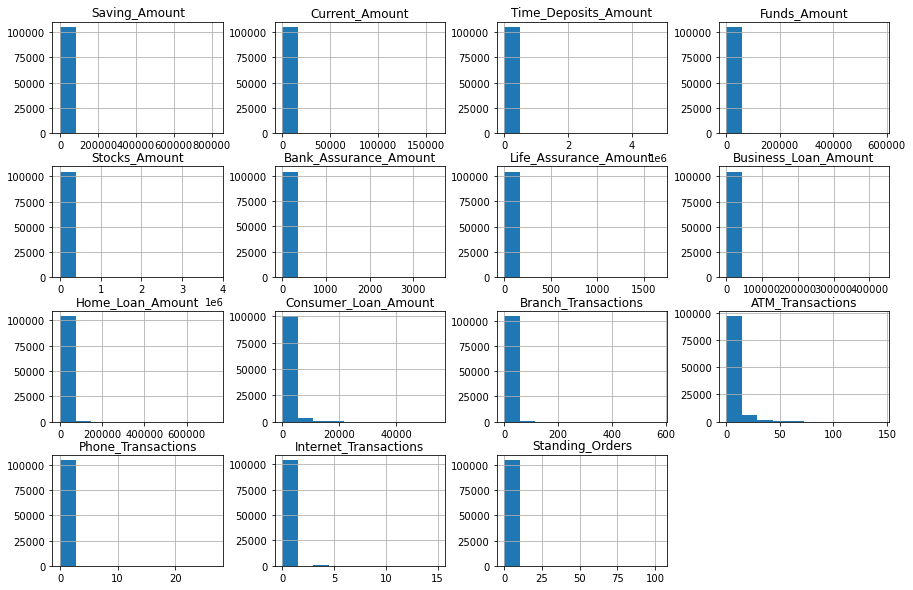

In [209]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
dfNums.hist(ax=ax)
plt.show()

In [210]:
#Nevybalancovany dataset, budeme řešit až při modelovani
df['New_Credit_Card_Flag'].value_counts()

0    98933
1     5800
Name: New_Credit_Card_Flag, dtype: int64

In [211]:
df.Age.describe() #rozdeleni na vekove skupiny, pro model lepsi nez konkretni cisla

count    104733.000000
mean         45.285803
std          15.540300
min          18.000000
25%          33.000000
50%          43.000000
75%          56.000000
max          90.000000
Name: Age, dtype: float64

In [212]:
#rozdeleni na kategorie na ctyri casti dle kvadratu
Age_Cat = pd.qcut(df['Age'], 4,  labels=['Younger', 'LowerMid', 'UpperMid', 'Older']) # -33, -44 -56 +56
Age_Cat

0         UpperMid
1            Older
2         UpperMid
3         UpperMid
4            Older
            ...   
104728    UpperMid
104729       Older
104730     Younger
104731    LowerMid
104732       Older
Name: Age, Length: 104733, dtype: category
Categories (4, object): ['Younger' < 'LowerMid' < 'UpperMid' < 'Older']

In [213]:
df['Age_Cat'] = Age_Cat

In [214]:
df = df.drop(['Age'], axis=1)

In [215]:
df.head(5)

,Customer_ID,Gender,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag,Age_Cat
0,1,M,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0,UpperMid
1,2,F,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0,Older
2,3,M,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0,UpperMid
3,4,M,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0,UpperMid
4,5,F,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0,Older


In [216]:
df.Tenure.describe()

count    104733.000000
mean         53.938453
std          30.054760
min           0.000000
25%          33.000000
50%          55.000000
75%          71.000000
max         194.000000
Name: Tenure, dtype: float64

In [217]:
#stejne rozdeleni pro tenure(kolik mesicu je u nas zakaznik)
Ten_Cat = pd.qcut(df['Tenure'], 4,  labels=['Junior', 'Normal', 'Senior', 'LongTerm']) # -33, -55 -71 +71
df['Ten_Cat'] = Ten_Cat

In [218]:
df = df.drop(['Tenure'], axis=1)

In [219]:
df.head(5)

,Customer_ID,Gender,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag,Age_Cat,Ten_Cat
0,1,M,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0,UpperMid,Normal
1,2,F,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0,Older,Normal
2,3,M,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0,UpperMid,Normal
3,4,M,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0,UpperMid,Normal
4,5,F,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0,Older,Normal


In [220]:
cols = list(df.columns.values)
cols

['Customer_ID',
 'Gender',
 'Saving_Amount',
 'Current_Amount',
 'Time_Deposits_Amount',
 'Funds_Amount',
 'Stocks_Amount',
 'Bank_Assurance_Amount',
 'Life_Assurance_Amount',
 'Business_Loan_Amount',
 'Home_Loan_Amount',
 'Consumer_Loan_Amount',
 'Branch_Transactions',
 'ATM_Transactions',
 'Phone_Transactions',
 'Internet_Transactions',
 'Standing_Orders',
 'New_Credit_Card_Flag',
 'Age_Cat',
 'Ten_Cat']

In [221]:
df = df[['Customer_ID','Gender','Age_Cat',
 'Ten_Cat',
 'Saving_Amount',
 'Current_Amount',
 'Time_Deposits_Amount',
 'Funds_Amount',
 'Stocks_Amount',
 'Bank_Assurance_Amount',
 'Life_Assurance_Amount',
 'Business_Loan_Amount',
 'Home_Loan_Amount',
 'Consumer_Loan_Amount',
 'Branch_Transactions',
 'ATM_Transactions',
 'Phone_Transactions',
 'Internet_Transactions',
 'Standing_Orders',
 'New_Credit_Card_Flag'
 ]]

In [222]:
df.head(5)

,Customer_ID,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag
0,1,M,UpperMid,Normal,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0
1,2,F,Older,Normal,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0
2,3,M,UpperMid,Normal,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0
3,4,M,UpperMid,Normal,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0
4,5,F,Older,Normal,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0


In [223]:
#soucet podobnych kategorii, celkem tri nove sloupce
Money_amt = df['Saving_Amount'] + df['Current_Amount'] + df['Time_Deposits_Amount'] + df['Funds_Amount'] + df['Stocks_Amount']

In [224]:
df['Money_Sum'] = Money_amt

In [225]:
Loan_sum = df['Business_Loan_Amount'] + df['Home_Loan_Amount'] + df['Consumer_Loan_Amount']
df['Loan_sum'] = Loan_sum

In [226]:
Trans_Sum = df['Branch_Transactions'] + df['ATM_Transactions'] + df['Phone_Transactions'] + df['Internet_Transactions'] + df['Standing_Orders']
df['Trans_sum'] = Trans_Sum

In [227]:
cols = list(df.columns.values)
cols

['Customer_ID',
 'Gender',
 'Age_Cat',
 'Ten_Cat',
 'Saving_Amount',
 'Current_Amount',
 'Time_Deposits_Amount',
 'Funds_Amount',
 'Stocks_Amount',
 'Bank_Assurance_Amount',
 'Life_Assurance_Amount',
 'Business_Loan_Amount',
 'Home_Loan_Amount',
 'Consumer_Loan_Amount',
 'Branch_Transactions',
 'ATM_Transactions',
 'Phone_Transactions',
 'Internet_Transactions',
 'Standing_Orders',
 'New_Credit_Card_Flag',
 'Money_Sum',
 'Loan_sum',
 'Trans_sum']

In [228]:
df = df[['Customer_ID','Gender','Age_Cat',
 'Ten_Cat',
 'Saving_Amount',
 'Current_Amount',
 'Time_Deposits_Amount',
 'Funds_Amount',
 'Stocks_Amount','Money_Sum',
 'Bank_Assurance_Amount',
 'Life_Assurance_Amount',
 'Business_Loan_Amount',
 'Home_Loan_Amount',
 'Consumer_Loan_Amount','Loan_sum',
 'Branch_Transactions',
 'ATM_Transactions',
 'Phone_Transactions',
 'Internet_Transactions',
 'Standing_Orders','Trans_sum',
 'New_Credit_Card_Flag'
 ]]

In [229]:
df.head(5)

,Customer_ID,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,...,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum,New_Credit_Card_Flag
0,1,M,UpperMid,Normal,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,20044.611429,0.000000,20044.611429,0,0,0,0,0,0,0
1,2,F,Older,Normal,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,2430.224286,2430.224286,4,3,0,0,0,7,0
2,3,M,UpperMid,Normal,18.825714,0.000000,0.0,0.0,0.0,18.825714,...,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
3,4,M,UpperMid,Normal,0.000000,603.791429,0.0,0.0,0.0,603.791429,...,0.000000,0.000000,0.000000,7,7,0,0,12,26,0
4,5,F,Older,Normal,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,2.720000,2.720000,0,0,0,0,0,0,0


In [230]:
df.corrwith(df['New_Credit_Card_Flag'])

Customer_ID             -0.070590
Saving_Amount           -0.021669
Current_Amount          -0.006670
Time_Deposits_Amount    -0.010456
Funds_Amount            -0.010447
Stocks_Amount           -0.002930
Money_Sum               -0.017291
Bank_Assurance_Amount    0.007735
Life_Assurance_Amount    0.012289
Business_Loan_Amount     0.018786
Home_Loan_Amount         0.002184
Consumer_Loan_Amount     0.087272
Loan_sum                 0.026516
Branch_Transactions      0.086831
ATM_Transactions         0.091312
Phone_Transactions       0.059876
Internet_Transactions    0.243737
Standing_Orders          0.015878
Trans_sum                0.133790
New_Credit_Card_Flag     1.000000
dtype: float64

In [231]:
#prasacke pretypovani
df['Saving_Amount'] = df['Saving_Amount'].astype(bool)
df['Current_Amount'] = df['Current_Amount'].astype(bool)
df['Time_Deposits_Amount'] = df['Time_Deposits_Amount'].astype(bool)
df['Funds_Amount'] = df['Funds_Amount'].astype(bool)
df['Stocks_Amount'] = df['Stocks_Amount'].astype(bool)
df['Bank_Assurance_Amount'] = df['Bank_Assurance_Amount'].astype(bool)
df['Life_Assurance_Amount'] = df['Life_Assurance_Amount'].astype(bool)
df['Home_Loan_Amount'] = df['Home_Loan_Amount'].astype(bool)
df['Business_Loan_Amount'] = df['Business_Loan_Amount'].astype(bool)
df['Consumer_Loan_Amount'] = df['Consumer_Loan_Amount'].astype(bool)
df['Branch_Transactions'] = df['Branch_Transactions'].astype(bool)
df['ATM_Transactions'] = df['ATM_Transactions'].astype(bool)
df['Phone_Transactions'] = df['Phone_Transactions'].astype(bool)
df['Internet_Transactions'] = df['Internet_Transactions'].astype(bool)
df['Standing_Orders'] = df['Standing_Orders'].astype(bool)

In [232]:
df.head(5)

,Customer_ID,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,...,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum,New_Credit_Card_Flag
0,1,M,UpperMid,Normal,False,False,False,False,False,0.000000,...,True,False,20044.611429,False,False,False,False,False,0,0
1,2,F,Older,Normal,False,False,False,False,False,0.000000,...,False,True,2430.224286,True,True,False,False,False,7,0
2,3,M,UpperMid,Normal,True,False,False,False,False,18.825714,...,False,False,0.000000,False,False,False,False,False,0,0
3,4,M,UpperMid,Normal,False,True,False,False,False,603.791429,...,False,False,0.000000,True,True,False,False,True,26,0
4,5,F,Older,Normal,False,False,False,False,False,0.000000,...,False,True,2.720000,False,False,False,False,False,0,0


In [233]:
for column in df:
    print(df[column].value_counts())

2049     1
45763    1
49869    1
51916    1
62155    1
        ..
3371     1
1322     1
7465     1
5416     1
2047     1
Name: Customer_ID, Length: 104733, dtype: int64
M    61950
F    42783
Name: Gender, dtype: int64
Younger     27746
UpperMid    26861
Older       25457
LowerMid    24669
Name: Age_Cat, dtype: int64
Normal      28102
Junior      26910
LongTerm    25483
Senior      24238
Name: Ten_Cat, dtype: int64
True     70142
False    34591
Name: Saving_Amount, dtype: int64
False    80559
True     24174
Name: Current_Amount, dtype: int64
False    101048
True       3685
Name: Time_Deposits_Amount, dtype: int64
False    99579
True      5154
Name: Funds_Amount, dtype: int64
False    94618
True     10115
Name: Stocks_Amount, dtype: int64
0.000000        12726
178.278571        498
0.005714          147
368.441429        126
154.507143        103
                ...  
10197.747143        1
305.185714          1
2260.895714         1
3515.391429         1
42.645714           1
Name: Money

In [234]:
df.head(3).transpose()

,0,1,2
Customer_ID,1,2,3
Gender,M,F,M
Age_Cat,UpperMid,Older,UpperMid
Ten_Cat,Normal,Normal,Normal
Saving_Amount,False,False,True
Current_Amount,False,False,False
Time_Deposits_Amount,False,False,False
Funds_Amount,False,False,False
Stocks_Amount,False,False,False
Money_Sum,0.0,0.0,18.825714


In [235]:
#Upravene csv pro EDA
df.to_csv('EdaBanking.csv', sep=';')
#tohle bylo pro modelovani uz bez costumerID
df = df.drop(['Customer_ID'], axis=1)
df.to_csv('ReadyBanking.csv', sep=';')